<a href="https://colab.research.google.com/github/JakubPyt/Medical_Data_Visualizer/blob/main/Medical_Data_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Data Visualizer

This project was created as part of the course on the free Code Camp website:

https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/medical-data-visualizer

On this project I make calculation and visualization from medical examination data using matplotlib, seaborn, pandas and numpy.

## Basic dataset

In [1]:
# Import of needed libraries
import pandas as pd
import numpy as np
import seaborn as sns

# Import the data 
url = 'https://raw.githubusercontent.com/JakubPyt/Medical_Data_Visualizer/main/medical_examination.csv'
data = pd.read_csv(url, sep=';', index_col='id')

# Display first five rows
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Task 1: Add 'overweight' column

Calculating overweight: 
 - Divide the weight in kilograms by the square of the height in meters 
 - If the value is > 25, it means that the person is overweight

The column should be 0 for NON-overweight person and 1 for an overweight person

In [ ]:
df = data.copy()

# Height basic is in cm, so we should divide values by 100
# Result in () below is True/False, so we should convert it to int(0 and 1)
df['overweight'] = (df['weight'] / ((df['height']/100)**2) > 25).astype(int)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


## Task 2: Normalize
- Normalize data by making 0 always good and 1 always bad. 
- If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
- If the value is more than 1, make the value 1.

In [ ]:
# 'gluc'
# Simply replace 1 to 0 
df['gluc'] = df['gluc'].replace(to_replace=1, value=0)

# As above - 2 and 3 to 1
# If you run this cell twice, you will have only 0 in column
df['gluc'] = df['gluc'].replace(to_replace=(2,3), value=1)

# Check values
print("Value counts in column 'gluc':\n", df['gluc'].value_counts())
print()

# 'cholesterol'
# The same operations as above
df['cholesterol'] = df['cholesterol'].replace(to_replace=1, value=0)
df['cholesterol'] = df['cholesterol'].replace(to_replace=(2,3), value=1)
print("Value counts in column 'cholesterol':\n", df['cholesterol'].value_counts())

Value counts in column 'gluc':
 0    59479
1    10521
Name: gluc, dtype: int64

Value counts in column 'cholesterol':
 0    52385
1    17615
Name: cholesterol, dtype: int64


## Task 3: Create catplot
Figure requirements:
- Created by sns.catplot()
- Kind: bar
- Two plots: One for cardio = 0 and one for cardio = 1
- For each of above value of cardio use columns: 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight' with sum of their values 0 and 1 


In [ ]:
# Before start, let's rebuild dataset to be more useful
# First, recall basic dataset 
print(">>> Basic dataset:")
df.head()

>>> Basic dataset:


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [ ]:
# Rebuild dataset from wide to long format
# I used cardio as id and given columns as value
df_cat = pd.melt(
    df, 
    id_vars='cardio', 
    value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
)

# Now we group dataset by these three columns and save size of groups to new column
df_cat['size'] = df_cat.groupby(['cardio', 'variable', 'value'])['value'].transform('size')

# Now we can delete duplicates 
df_cat.drop_duplicates(subset=['variable', 'size'], keep='first', inplace=True)

# And also reset index for a better presentation
df_cat = df_cat.reset_index(drop=True)
df_cat

,cardio,variable,value,size
0,0,cholesterol,0,29330
1,1,cholesterol,1,11924
2,1,cholesterol,0,23055
3,0,cholesterol,1,5691
4,0,gluc,0,30894
5,1,gluc,0,28585
6,0,gluc,1,4127
7,1,gluc,1,6394
8,0,smoke,0,31781
9,1,smoke,0,32050


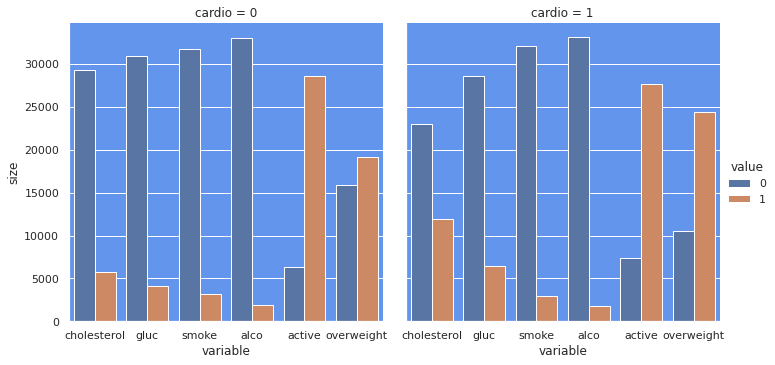

In [ ]:
# Now, we can draw the plot

# Settings of figure
sns.set(rc={
    'axes.facecolor':'cornflowerblue', 
    'figure.facecolor':'white'
})

# Draw the figure
sns.catplot(
    x='variable', 
    y="size",  
    hue="value",  # For two bars for each x
    col="cardio",  # Two plots(one for each value of cardio)  
    kind="bar",  # Kind of plots
    data=df_cat  # Source of data
)

## Task 4.1: Cleaning
In this part my goal is draw the specific heatmap, but first i need to clean the data.

Filter out the following patient segments that represent incorrect data:
1. Diastolic pressure('ap_lo') is higher than systolic('ap_hi').
2. Height is less than the 2.5th percentile.
3. Height is more than the 97.5th percentile.
4. Weight is less than the 2.5th percentile.
5. Weight is more than the 97.5th percentile.

In [ ]:
df_heat = df.copy()
print("No. rows before cleaning:", df_heat.shape[0])

# diastolic pressure('ap_lo') is higher than systolic('ap_hi')
df_heat = df_heat.drop(df_heat.loc[(df_heat['ap_lo'] > df_heat['ap_hi'])].index)
print("No. rows after part 1 of cleaning:", df_heat.shape[0])

# height is less than the 2.5th percentile
df_heat = df_heat.drop(df_heat.loc[(df_heat['height'] < df_heat['height'].quantile(0.025))].index)
print("No. rows after part 2 of cleaning:", df_heat.shape[0])

# height is more than the 97.5th percentile
df_heat = df_heat.drop(df_heat.loc[(df['height'] > df['height'].quantile(0.975))].index)
print("No. rows after part 3 of cleaning:", df_heat.shape[0])

# weight is less than the 2.5th percentile
df_heat = df_heat.drop(df_heat.loc[(df['weight'] < df['weight'].quantile(0.025))].index)
print("No. rows after part 4 of cleaning:", df_heat.shape[0])

# weight is more than the 97.5th percentile
df_heat = df_heat.drop(df_heat.loc[(df['weight'] > df['weight'].quantile(0.975))].index)
print("No. rows after part 5 of cleaning:", df_heat.shape[0])

No. rows before cleaning: 70000
No. rows after part 1 of cleaning: 68766
No. rows after part 2 of cleaning: 67260
No. rows after part 3 of cleaning: 65859
No. rows after part 4 of cleaning: 64623
No. rows after part 5 of cleaning: 63259


## Task 4.2: Create correlation matrix
Requirements:
 - Plot the correlation matrix using seaborn's `heatmap()`
 - Mask the upper triangle

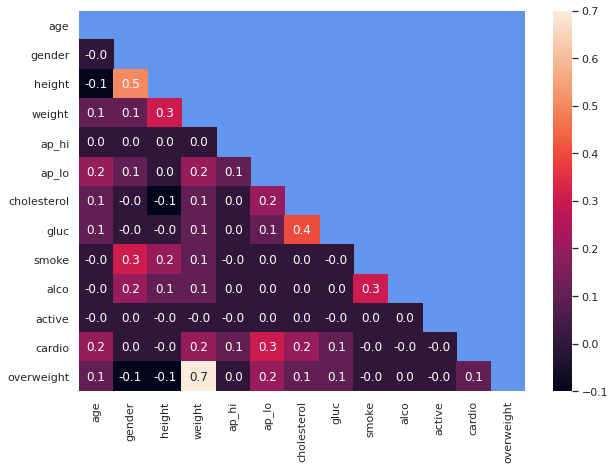

In [ ]:
# Calculate the correlation matrix
corr = round(df_heat.corr().astype(float),1)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr))

# Settings of figure
sns.set(rc={
    'axes.facecolor':'cornflowerblue', 
    'figure.facecolor':'white',
    'figure.figsize':(10,7),
})

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(
    corr, 
    annot=True, 
    mask=mask, 
    fmt='.1f'
)